# Assignment 2.1

Name: Manoj Patra

Date: May 19, 2025

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

In [107]:
# Import statements
import numpy as np
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import seaborn as sns

## Problem # 2.1.

For the rain simulation example in Section 2.1.1, but with probability of rain 0.30 on any
given day, simulate the outcome (a) on the next day, (b) the next 10 days. (c) Simulate the
proportion of days of rain for the next (i) 100 days, (ii) 10,000 days, (iii) 1,000,000 days. Use
the simulation to explain the long-run relative frequency definition of probability.

```

Probability of rain on any given day = 0.30

(a) Simulation of the outcome on the next day is as follows:

```

In [108]:
p_rain = 0.30

In [113]:
# Simulate rain on the next day with p = 0.30
days = 1
rain_next_day = np.random.binomial(n=days, p=p_rain)

print(f"The outcome of the simulation was {rain_next_day}, " \
      f"representing {"rain" if rain_next_day == 1 else "no rain."}")

The outcome of the simulation was 1, representing rain


`(b) Simulation of the outcome for the next 10 days`

In [114]:
# Simulate rain over 10 days with p = 0.30
days = 10
rain_10_days = np.random.binomial(n=days, p=p_rain)

print(f"Based on the simulation, it will rain on " \
      f"{rain_10_days} out of 10 days.")

Based on the simulation, it will rain on 5 out of 10 days.


`(c) Simulation of the proportion of days of rain for the next 100 days, 10,000 days, and 1,000,000 days`

The proportion of rainy days over 100 days is 0.23
The proportion of rainy days over 10000 days is 0.31
The proportion of rainy days over 1000000 days is 0.30


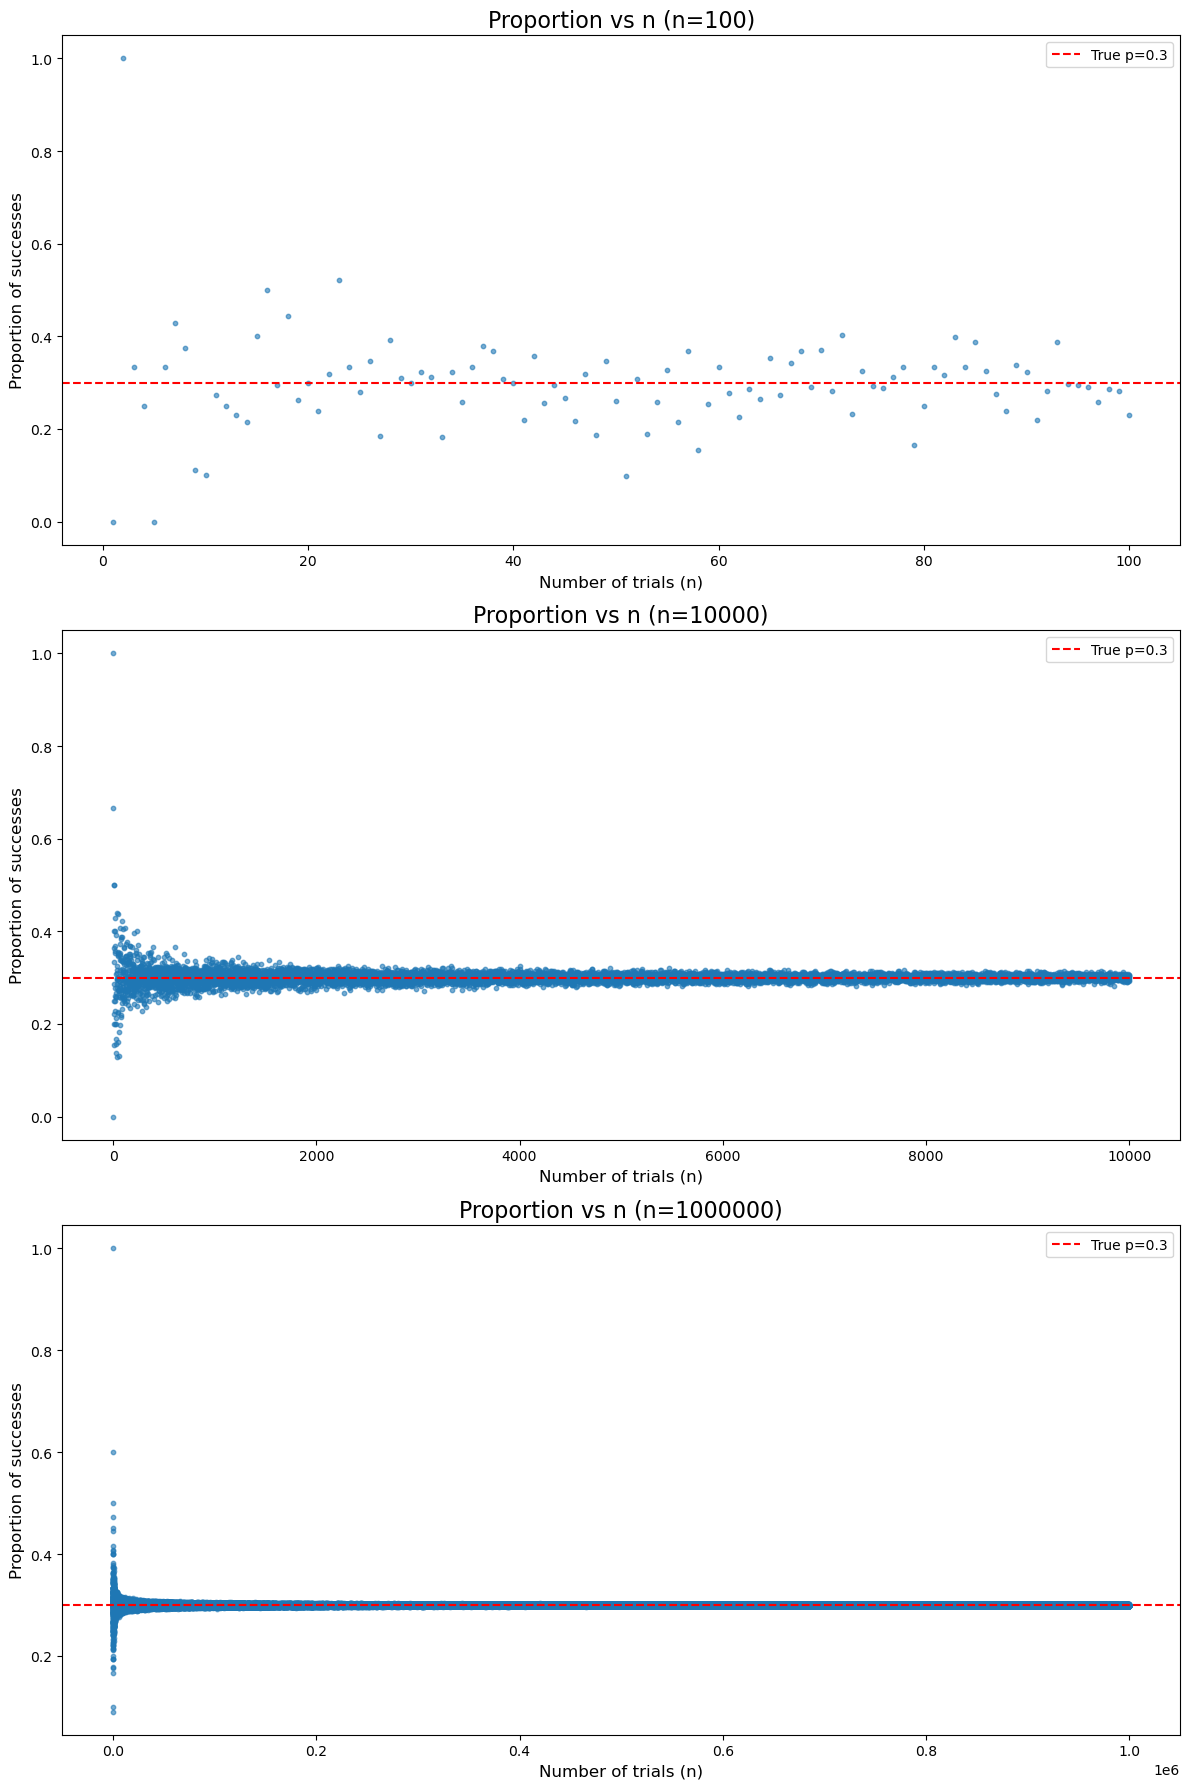

In [115]:
# Simulate rain over 100, 10_000, and 1_000_000 days with p = 0.30
days_list = [100, 10_000, 1_000_000]

# Function to simulate the proportion of rainy days over time
def run_binom(days, p):
    proportions = []
    for i in range(1, days):
        rainy_days = np.random.binomial(n=i, p=p)
        proportion = rainy_days / i
        proportions.append(proportion)
        if (i == days - 1):
            print(f"The proportion of rainy days over {i} " \
                  f"days is {proportion:.2f}")
    return proportions

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for ax, n in zip(axes, days_list):
    proportions = run_binom(n + 1, p_rain)
    ax.scatter(range(1, n + 1), proportions, s=10, alpha=0.6)
    ax.set_title(f"Proportion vs n (n={n})", size=16)
    ax.set_xlabel("Number of trials (n)", size=12)
    ax.set_ylabel("Proportion of successes", size=12)
    ax.axhline(p_rain, color='red', linestyle='--', 
               label=f"True p={p_rain}")
    ax.legend()

plt.tight_layout()
plt.show()

```

Explanation for the long-run relative frequency definition of probability:

1. n = 100 (Top Plot):
- The proportion of successes (blue dots) fluctuates quite a bit around 0.3.
- Some values are very far off from the true probability.
- With only 100 trials, the relative frequency is unstable and varies significantly from run to run.

2. n = 10,000 (Middle Plot):
- The blue dots still show some variability, but the spread is much tighter around 0.3.
- As the number of trials increases, the relative frequency of success gets closer to the true probability of 0.3 more consistently.

3. n = 1,000,000 (Bottom Plot):
- The proportions now cluster very tightly around 0.3.
- Outliers are rare and minimal.
- In the long run, with a very large number of trials, the observed proportion converges to the actual probability.

Thus, we can conclude that the probability of an event can be approximated by the proportion of times it occurs in a large number of trials. And as the number of trials increases, this proportion tends to converge to the true probability.

```

## Problem # 2.2.

Data analysts often implement statistical inference methods by setting the probability of a
correct inference equal to 0.95. Let *A* denote the event that an inference for the population
about men is correct. Let *B* represent the event of a corresponding inference about women
being correct. Suppose that these are independent events.


(a) Find the probability that (i) *both* inferences are correct, (ii) *neither* inference is correct.  
(b) Construct the probability distribution for *Y* = number of correct inferences.  
(c) With what probability would each inference need to be correct in order for the probability to be 0.95 that *both* are correct?



```

(a) The probability that 

(i) both inferences are correct is approximately 0.9 and
(ii) neither inference is correct is close to 0.

```

In [116]:
p_men_correct = 0.95
p_women_correct = 0.95
p_men_incorrect = 1 - p_men_correct
p_women_incorrect = 1 - p_women_correct

# Since, these are independent events, P(AB) = P(A)*P(B)
p_both_correct = p_men_correct * p_women_correct
p_neither_correct = p_men_incorrect * p_women_incorrect

print(f"Probability both inferences are correct: " \
      f"{p_both_correct:.2f}")
print(f"Probability neither inference is correct: " \
      f"{p_neither_correct:.2f}")

Probability both inferences are correct: 0.90
Probability neither inference is correct: 0.00


```

(b) 

Y = number of correct inferences

Y can have values of 0, 1 and 2.

The probability distribution for Y is as follows:

```

In [117]:
# P(Y=0): Neither correct = p_neither_correct
p_Y_0 = p_neither_correct
# P(Y=1): Exactly one correct = 
# P(men correct & women incorrect) + P(men incorrect & women correct)
p_Y_1 = p_men_correct * p_women_incorrect + \
    p_men_incorrect * p_women_correct
# P(Y=2): Both correct = p_both_correct
p_Y_2 = p_both_correct

data = {
    "Y = Number of Correct Inferences": [0, 1, 2],
    "Probability": [round(e, 2) for e in [p_Y_0, p_Y_1, p_Y_2]]
}

df = pd.DataFrame(data)
df

,Y = Number of Correct Inferences,Probability
0,0,0.0
1,1,0.1
2,2,0.9


```

(c) In order for the probability that both are correct to be 0.95, the probability that each inference need to be correct is 0.97.

```

In [118]:
# Since, A and B are independent events with 
# equal probabilities of being correct:
# P(AB) = P(A)*P(B) => P(A) = P(B) = sqrt(P(AB))
p_both_correct = 0.95
p_needed = np.sqrt(p_both_correct)
print(f"Probability needed for each inference to get " \
      f"P(both correct) = 0.95: {p_needed:.2f}")

Probability needed for each inference to get P(both correct) = 0.95: 0.97


## Problem # 2.4.

A wine connoisseur is asked to match five glasses of red wine with the bottles from which they
came, representing five different grape types.


(a) Set up a sample space for the five guesses.  
(b) With random guessing, find the probability of getting all five correct.

```

(a) The number of ways to match 5 glasses with 5 bottles is 

5! = 5 x 4 x 3 x 2 x 1 = 120. 

So, the sample space for this problem is 120.

```

In [119]:
wines = [1, 2, 3, 4, 5]
arrangements = list(itertools.permutations(wines))
sample_space = len(arrangements)
print(f"Sample space: {sample_space}")

Sample space: 120


```

(b) Since, there is only one way of getting a correct match, the probability of getting all five correct with random guessing is (1 / n!), approximately 0.01.

```

In [120]:
print(f"Probability of all correct matches: {(1/sample_space):.2f}")

Probability of all correct matches: 0.01


## Problem # 2.15.

Each week an insurance company records *Y* = number of payments because of a home burning
down. State conditions under which we would expect *Y* to approximately have a Poisson
distribution.


```

The Poisson distribution applies as an approximation for the binomial when n is very large and π is very small, with 𝜇 = 𝑛𝜋.

The binomial event in this case is whether a home burns down or not.

So, the conditions under which we would expect Y to approximately have a Poisson distribution are:

1. The company insures a very large number of homes n.
2. The probability π for all insured homes is very small.
3. Each home burning down is independent of other homes - independent events.
4. The rate of homes burning down remains relatively stable over time - constant rate of occurrences.
5. Two homes cannot burn down at exactly the same instant - impossible to have two or more events simultaneously.

```

## Problem # 2.16.

Each day a hospital records the number of people who come to the emergency room for treatment.

(a)  In the first week, the observations from Sunday to Saturday are 10, 8, 14, 7, 21, 44, 60.
Do you think that the Poisson distribution might describe the random variability of this
phenomenon adequately. Why or why not?  
(b) Would you expect the Poisson distribution to better describe, or more poorly describe,
the number of weekly admissions to the hospital for a rare disease? Why?

```

(a) No, Poisson distribution will not describe the random variability of this phenomenon adequately. 

In a Poisson distribution

(i) the mean should equal the variance,
(ii) the count of events in disjoint periods should be independent,
(iii) two or more events are not possible simultaneously, and
(iv) rate of occurrences of events should be constant.

However, in this case, variance is much greater than the mean resulting in a larger spread of data. The occurrences of events is higher on Friday and Saturday. This could mean that events are also likely not independent.

```

In [121]:
data = np.array([10, 8, 14, 7, 21, 44, 60])
mean = np.mean(data)
# ddof set to 1 to calculate sample variance
variance = np.var(data, ddof=1)
round(mean, 2), round(variance, 2)

(np.float64(23.43), np.float64(423.95))

```

(b) Yes, we can expect the Poisson distribution to better describe the number of weekly admissions to the hospital for a rare disease (a rare event) because:

(i) rare events occur randomly over time,
(ii) count of rare events will be low in this case and, independent for disjoint periods,
(iii) rate of occurrences even though small would be close to a constant.

```

## Problem # 2.17.

An instructor gives a course grade of B to students who have total score on exams and homeworks between 800 and 900, where the maximum possible is 1000. If the total scores have
approximately a normal distribution with mean 830 and standard deviation 50, about what proportion of the students receive a B?


```

The proportion of students who receive a B is approximately 0.64.

```

In [122]:
mean = 830
std_dev = 50
range_low = 800
range_high = 900

# Calculate the proportion of students who receive a B
prop_B = norm.cdf(range_high, mean, std_dev) - \
        norm.cdf(range_low, mean, std_dev)

print(f"The proportion of students who receive " \
      f"a B is approximately {round(prop_B, 2)}.")


The proportion of students who receive a B is approximately 0.64.


## Problem # 2.20.

Create a data file with the income values in the `Income` data file linked on the Module 2 Readings page.

(a) Construct a histogram or a smooth-curve approximation for the *pdf* of income in the
corresponding population by plotting results using the density function in R (explained
in Exercise 1.18).  
(b)  Of the probability distributions studied in this chapter, which do you think might be
most appropriate for these data? Why? Plot the probability function of that distribution
having the same mean and standard deviation as the income values. Does it seem to
describe the income distribution well?


In [131]:
# Load the data
url = "https://stat4ds.rwth-aachen.de/data/Income.dat"
data = pd.read_csv(url, delim_whitespace=True)

# Extract income column
income = data["income"].values
min = income.min()
max = income.max()
mean = income.mean()
std = income.std()

/var/folders/qq/lgwndys531ggs9bbc5sj1p_80000gn/T/ipykernel_97317/3454740485.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True)


`(a) The histogram and the smooth-curve approximation for the pdf of income distribution are as follows:`

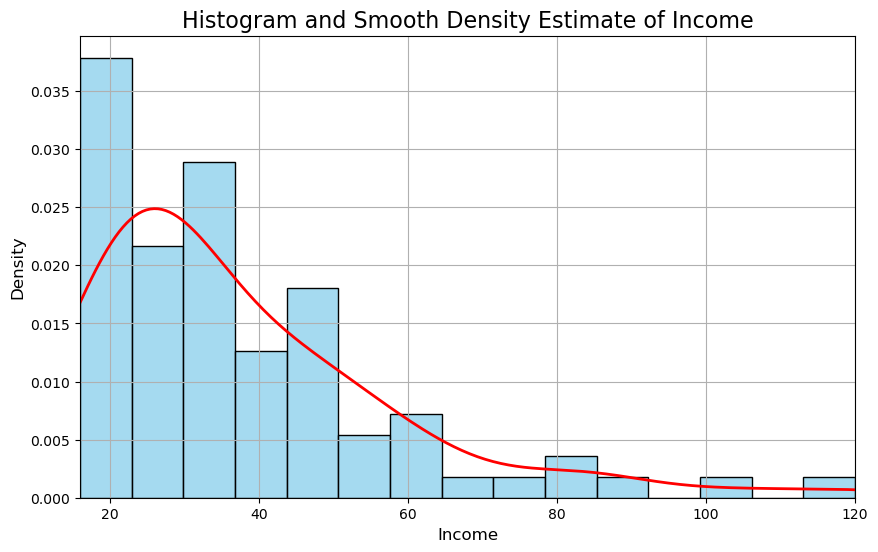

In [133]:
plt.figure(figsize=(10, 6))

# Plot histogram
sns.histplot(income, stat="density", color="skyblue",
             edgecolor="black", bins=15, label="Histogram")
# Plot smooth-curve approximation
# kernel density estimation method finds a smooth-curve approximation for a histogram
sns.kdeplot(income, color="red", linewidth=2, 
            label="KDE Curve", clip=(min, max))
plt.xlim(min, max)
plt.title("Histogram and Smooth Density Estimate of Income", size=16)
plt.xlabel("Income", size=12)
plt.ylabel("Density", size=12)
plt.grid(True)
plt.show()


```

(b) Gamma distribution might be the most appropriate for these data because:

1. The income data is positively right-skewed (long tail on the right).
2. The Gamma distribution models skewness naturally.
3. The data is continuous and strictly positive.

As shown below, in the plot, gamma distribution does describe the income distribution well.

```

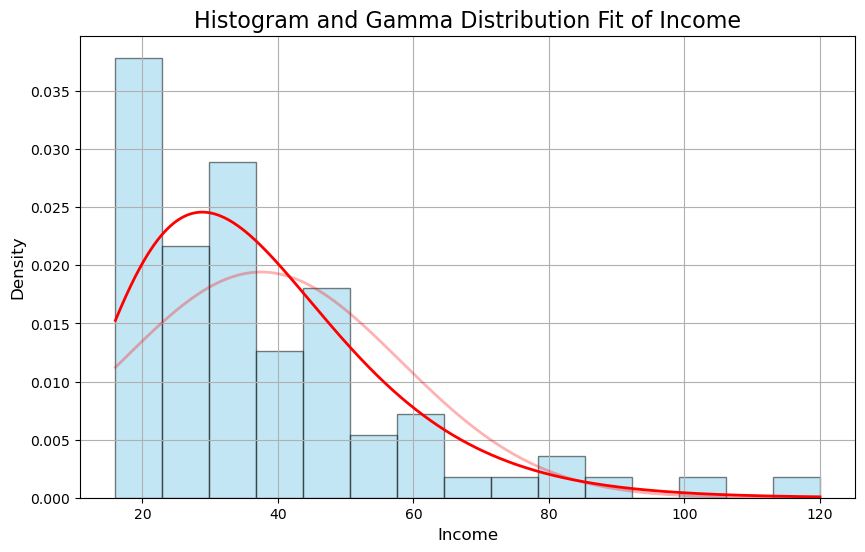

In [134]:
x = np.linspace(min, max, 1000)

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(income, bins=15, density=True, alpha=0.5,
         color='skyblue', edgecolor='black')

# Plot gamma distribution using gamma function
k, loc, scale = gamma.fit(income, floc=0)
pdf = gamma.pdf(x, k, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2)

# Plot probability distribution using mean and standard deviation
plt.plot(x, norm.pdf(x, mean, std), lw=2, color='r', alpha=0.3)

plt.title('Histogram and Gamma Distribution Fit of Income', size=16)
plt.xlabel('Income', size=12)
plt.ylabel('Density', size=12)
plt.grid(True)
plt.show()

## Problem # 2.21.

Plot the gamma distribution by fixing the shape parameter *k* = 3 and setting the scale parameter
= 0.5, 1, 2, 3, 4, 5. What is the effect of increasing the scale parameter? (See also Exercise 2.48.)

```

Effect of increasing the scale parameter is as follows:

1. Increasing the scale parameter stretches the distribution to the right, making it more spread out over larger values of y.
2. The peak of the distribution moves towards higher y-values as the scale increases.
3. The height of the peak decreases because the total area under the curve must remain 1, so spreading out the distribution lowers the peak.
4. The distribution becomes more right-skewed with a longer tail as the scale increases.

In summary, as the scale parameter increases, the gamma distribution becomes wider and less peaked, shifting the mass toward larger y-values.

```

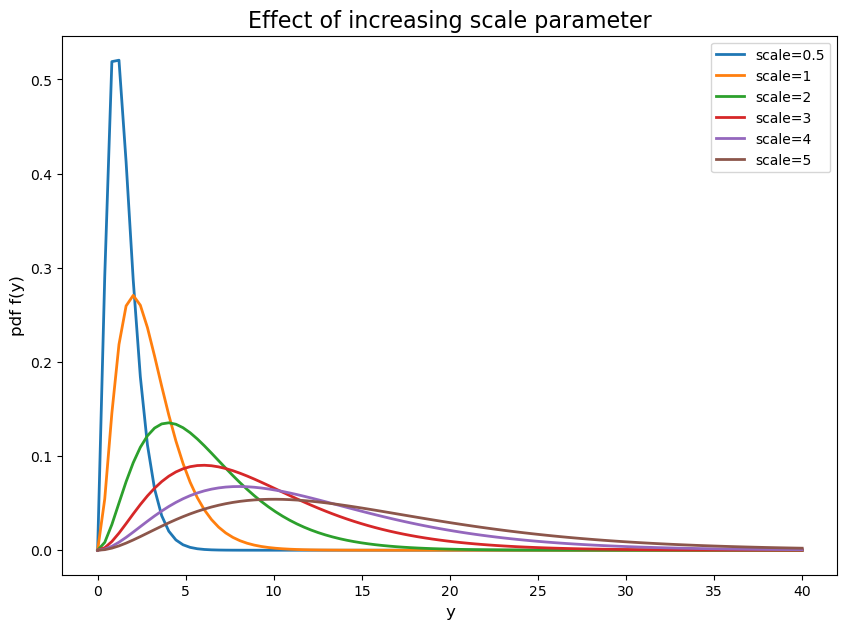

In [135]:
k = 3
scale = [0.5, 1, 2, 3, 4, 5]

x = np.linspace(0, 40, 100)

def gamma_pdfs():
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    for i in range(len(scale)):
        ax.plot(x, gamma.pdf(x, k, 0, scale[i]), lw=2)
    ax.legend([f"scale={v}" for v in scale], loc='upper right')

gamma_pdfs()
plt.title("Effect of increasing scale parameter", size=16)
plt.xlabel("y", size=12)
plt.ylabel("pdf f(y)", size=12)
plt.show()

## Problem # 2.22.

Consider the mammogram diagnostic example in Section 2.1.4.

(a) Show that the joint probability distribution of diagnosis and disease status is as shown in
Table 2.6. Given that a diagnostic test result is positive, explain how this joint distribution
shows that the 12% of incorrect diagnoses for the 99% of women not having breast cancer
swamp the 86% of correct diagnoses for the 1% of women actually having breast cancer.  
(b) The first test for detecting HIV-positive status had a sensitivity of 0.999 and specificity
of 0.9999. Explain what these mean. If at that time 1 in 10,000 men were truly HIVpositive, find the positive predictive value. Based on this example, explain the potential
disadvantage of routine diagnostic screening of a population for a rare disease.

**TABLE 2.6** Joint probability distribution for disease status and diagnosis of breast cancer
mammogram, based on conditional probabilities in Table 2.1

| Disease Status | Positive (+) | Negative (-) | Total |
|----------------|--------------|--------------|-------|
| Yes (D)        | 0.0086       | 0.0014       | 0.01  |
| No ($D^c$)        | 0.1188       | 0.8712       | 0.99  |


<!-- (a) Show that the joint probability distribution of diagnosis and disease status is as shown in
Table 2.6. Given that a diagnostic test result is positive, explain how this joint distribution
shows that the 12% of incorrect diagnoses for the 99\% of women not having breast cancer
swamp the 86\% of correct diagnoses for the 1\% of women actually having breast cancer.  
(b) The first test for detecting HIV-positive status had a sensitivity of 0.999 and specificity
of 0.9999. Explain what these mean. If at that time 1 in 10,000 men were truly HIVpositive, find the positive predictive value. Based on this example, explain the potential
disadvantage of routine diagnostic screening of a population for a rare disease.

**TABLE 2.6** Joint probability distribution for disease status and diagnosis of breast cancer
mammogram, based on conditional probabilities in Table 2.1

| **Disease Status** | **Diagnosis from Mammogram** |              |           |
|--------------------|------------------------------|--------------|-----------|
|                    | Positive (+)                 | Negative (-) | **Total** |
| Yes (D)            | 0.0086                       | 0.0014       | 0.01      |
| No ( $ D^c$ )      | 0.1188                       | 0.8712       | 0.99      | -->

```

(a) Let's verify the joint probability distribution

Given:
P(D) = 0.01 (prevalence of breast cancer)
P(D^c) = 0.99 (probability of no breast cancer)
P(+|D) = 0.86 (sensitivity)
P(-|D^c) = 0.88 (specificity)

Joint probabilities:
P(+,D) = P(D) × P(+|D) = 0.01 × 0.86 = 0.0086
P(-,D) = P(D) × P(-|D) = 0.01 × 0.14 = 0.0014
P(+,D^c) = P(D^c) × P(+|D^c) = 0.99 × 0.12 = 0.1188
P(-,D^c) = P(D^c) × P(-|D^c) = 0.99 × 0.88 = 0.8712

For positive test results:
P(D|+) = P(+,D) / [P(+,D) + P(+,D^c)]
= 0.0086 / (0.0086 + 0.1188)
= 0.0086 / 0.1274
≈ 0.0675 or about 6.75%

```

In [127]:
# Based on the calculations explained above:
data = {
    'Positive (+)': [0.0086, 0.1188],
    'Negative (-)': [0.0014, 0.8712],
    'Total': [0.01, 0.99]
}

index = ['Yes (D)', 'No (D^c)']
df = pd.DataFrame(data, index=index)

print("Joint Probability Distribution:")
print(df)


p_disease_given_positive = 0.0086/(0.0086 + 0.1188) 
print("\nWhen test is positive:")
print(f"Probability of having disease: " \
      f"{p_disease_given_positive:.4f}")
print(f"Probability of not having disease: " \
      f"{(1 - p_disease_given_positive):.4f}")


Joint Probability Distribution:
          Positive (+)  Negative (-)  Total
Yes (D)         0.0086        0.0014   0.01
No (D^c)        0.1188        0.8712   0.99

When test is positive:
Probability of having disease: 0.0675
Probability of not having disease: 0.9325


```

(b) HIV test analysis

A sensitivity of 0.999 represents the conditional probability P(+|D) of the test being positive given that the person has the disease.

A specificity of 0.9999 represents the conditional probability P(-|D^c) of the test being negative given that the person does not have the disease.

Based on the calculations shown below, when screening for rare diseases, even with highly accurate tests (sensitivity=0.999, specificity=0.9999), the positive predictive value is still quite low (around 50%). This means that a large proportion of positive test results are actually false positives. Thus, the potential disadvantages of routine diagnostic screening of a population for a rare disease are:
1. Unnecessary anxiety and stress for patients
2. Additional costly follow-up testing
3. Potential unnecessary treatments
4. Strain on healthcare resources

```

In [128]:
specificity = 0.9999 # P(-|D^c)
sensitivity = 0.999 # P(+|D)
prevalence = 1/10000 # P(D)

# Calculate positive predictive value
# P(D|+) = [P(+|D)×P(D)] / [P(+|D)×P(D) + P(+|D^c)×P(D^c)]
false_positive_rate = 1 - specificity # P(+|D^c)
numerator = sensitivity * prevalence
denominator = sensitivity * prevalence + \
    false_positive_rate * (1 - prevalence)
ppv = numerator / denominator

print("\nHIV Test Analysis:")
print(f"Positive Predictive Value: {ppv:.2f}")


HIV Test Analysis:
Positive Predictive Value: 0.50


## Problem # 2.27.

The distribution of *X* = heights *(cm)* of women in the U.K. is approximately *N*(162, $7^2$).
Conditional on *X = x*, suppose *Y* = weight *(kg)* has a *N*(3.0 + 0.40x, $8^2$) distribution. Simulate
and plot 1000 observations from this approximate bivariate normal distribution. Approximate
the marginal means and standard deviations for *X* and *Y*. Approximate and interpret the
correlation.


```

Summary Statistics:
Height - Mean: 162.14 cm, SD: 6.85 cm
Weight - Mean: 68.42 kg, SD: 8.33 kg
Correlation coefficient: 0.290

The correlation coefficient of 0.290 indicates a weak to moderate positive linear relationship between height and weight.

This means that as height increases, weight tends to increase as well, but the relationship is not very strong.

The relatively low correlation suggests that while there is some predictable relationship between height and weight, there is considerable variation and other factors likely influence a person's weight beyond just their height.


```

Summary Statistics:
Height - Mean: 162.14 cm, SD: 6.85 cm
Weight - Mean: 68.42 kg, SD: 8.33 kg
Correlation coefficient: 0.290


<Figure size 1000x700 with 0 Axes>

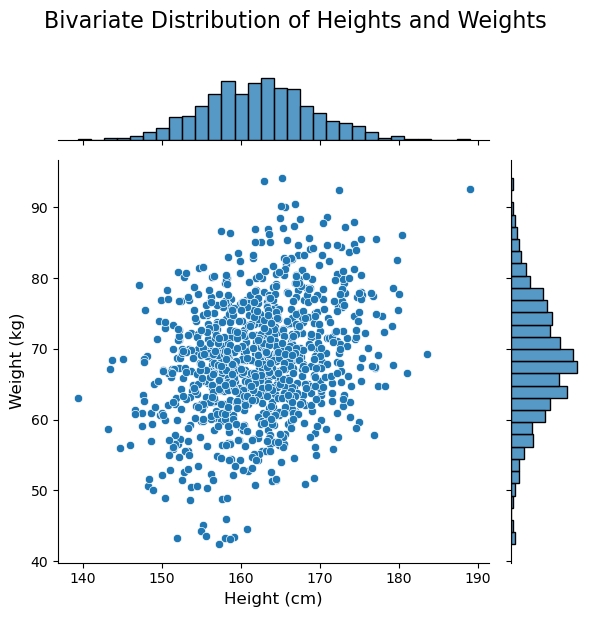

In [129]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 height observations from N(162, 7^2)
n = 1000
heights = np.random.normal(162, 7, n)

# Generate weights based on conditional 
# distribution N(3.0 + 0.40x, 8^2)
weights = np.random.normal(3.0 + 0.40 * heights, 8, n)

# Calculate marginal means and standard deviations
height_mean = np.mean(heights)
height_std = np.std(heights)
weight_mean = np.mean(weights)
weight_std = np.std(weights)

# Calculate correlation
correlation = np.corrcoef(heights, weights)[0,1]

# Create scatter plot with marginal distributions
plt.figure(figsize=(10, 7))
sns.jointplot(x=heights, y=weights, kind='scatter', 
              marginal_kws=dict(bins=30))
plt.suptitle('Bivariate Distribution of Heights and Weights', 
             y=1.02, size=16)

# Print summary statistics
print("Summary Statistics:")
print(f"Height - Mean: {height_mean:.2f} cm, " \
      f"SD: {height_std:.2f} cm")
print(f"Weight - Mean: {weight_mean:.2f} kg, " \
      f"SD: {weight_std:.2f} kg")
print(f"Correlation coefficient: {correlation:.3f}")

plt.xlabel('Height (cm)', size=12)
plt.ylabel('Weight (kg)', size=12)

plt.tight_layout()
plt.show()